# LINEAR REGRESSION

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

sns.set()
pd.set_option('display.precision', 3)

Read data

In [57]:
datasetTrain = pd.read_csv('../Dades/X_train_modified.csv')
datasetTest  = pd.read_csv('../Dades/X_test_modified.csv')

columsToDrop = ['Maximum Installs', 'Price', 'Size', 'Download', 'Last Updated', 'Installs', 'ModInstalls', 'Exit', 'ModExit']
categoricalColumns = ['Category', 'Free', 'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice']

# Convert to categorical variables
for column in categoricalColumns:
    datasetTrain[column] = datasetTrain[column].astype('category')
    datasetTest[column] = datasetTest[column].astype('category')

# Drop repeated or unwanted data (Installs is the catageorial version of "Maximum installs")
datasetTrain = datasetTrain.drop(columns=columsToDrop)
datasetTest  = datasetTest.drop(columns=columsToDrop)
    
datasetTrain.dtypes

Category              category
Rating                 float64
Free                  category
Released               float64
Content Rating        category
Ad Supported          category
In App Purchases      category
Editors Choice        category
ModMaximumInstalls     float64
ModRating              float64
ModPrice               float64
ModSize                float64
ModLast Updated        float64
dtype: object

Intead of ignoring categorical variables, we will do a smart trick. For each of varible, if there are $k$ categries, we will create $k$ new binary variables were the $i-th$ variable will be one iff the original variable value is the $i-th$ category

In [61]:
def convertDataSet(X, l):
    for column in l:
        Classes = X[column].unique()
        for i in Classes:
            name = column + str(i)
            X[name] = X[column]
            X[name] = np.where(X[name] == i, 1, 0)
        
        
convertDataSet(datasetTrain, categoricalColumns)
convertDataSet(datasetTest, categoricalColumns)

datasetTrain = datasetTrain.drop(columns=categoricalColumns)
datasetTest  = datasetTest.drop(columns=categoricalColumns)

datasetTrain.dtypes

Rating                   float64
Released                 float64
ModMaximumInstalls       float64
ModRating                float64
ModPrice                 float64
                          ...   
Ad SupportedFalse          int64
In App PurchasesFalse      int64
In App PurchasesTrue       int64
Editors ChoiceFalse        int64
Editors ChoiceTrue         int64
Length: 69, dtype: object

Construct X and Y

In [62]:
Xtrain = datasetTrain.loc[:, datasetTrain.columns != 'ModMaximumInstalls']
Ytrain = datasetTrain['ModMaximumInstalls']

Xtest = datasetTest.loc[:, datasetTest.columns != 'ModMaximumInstalls']
Ytest = datasetTest['ModMaximumInstalls']

Regression

In [27]:
# We instantiate a linear regression. 
lr = LinearRegression()

# Now we train it on train data with fit method
lr.fit(Xtrain,Ytrain)

# We can predict using the predict method
Ypred = lr.predict(Xtrain)

weights = lr.coef_
intercept = lr.intercept_
# You can access to some info about the model, like the weights.
print('Coefficients: \n', weights[:10])
print('Intercept: \n', intercept)



# alternately
model = sm.OLS(Ytrain, sm.add_constant(Xtrain))
result = model.fit()
result.summary()

Coefficients: 
 [ 8.62371920e-01  3.78847140e-01 -7.15232537e-01 -3.38813814e-02
  3.15376098e-02 -2.60096060e-01 -2.21304553e+09 -2.21304553e+09
 -2.21304553e+09 -2.21304553e+09]
Intercept: 
 -47959732446.37132


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ModMaximumInstalls   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     1771.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:38:15   Log-Likelihood:            -3.0142e+05
No. Observations:              249379   AIC:                         6.030e+05
Df Residuals:                  249316   BIC:                         6.036e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.916e+10   1.27e+11      0.387      0.699      -2e+11    2.98e+11
Rating                              0.8624      0.011     78.035      0.000       0.841       0.884
Released                            0.3788      0.003    142.553      0.000       0.374       0.384
ModRating                          -0.7152      0.007   -102.151      0.000      -0.729      -0.702
ModPrice                           -0.0339      0.007     -5.060      0.000      -0.047      -0.021
ModSize                             0.0315      0.002     18.012      0.000       0.028       0.035
ModLast Updated                    -0.2601      0.002   -136.651      0.000      -0.264      -0.256
CategoryMusic & Audio            1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryNews & Magazines         1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryLifestyle                1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryAction                   1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategorySocial                   1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryEducation                1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryBooks & Reference        1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryCommunication            1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryAdventure                1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryEntertainment            1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryAuto & Vehicles          1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryFinance                  1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryRole Playing             1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategorySimulation               1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryEducational              1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryHealth & Fitness         1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryMusic                    1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryBusiness                 1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryWeather                  1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryTravel & Local           1.126e+09   2.91e+09      0.387      0.699   -4.58e+09    6.83e+09
CategoryFood & Drink             1.126e+09   2.91e+09      0.387      0.699   -4.58

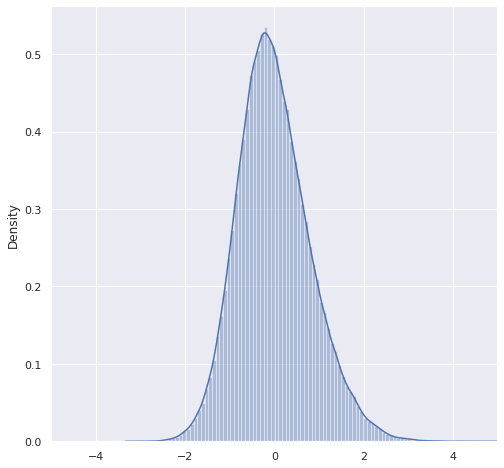

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-5,5])
sns.distplot(result.resid,bins=100);

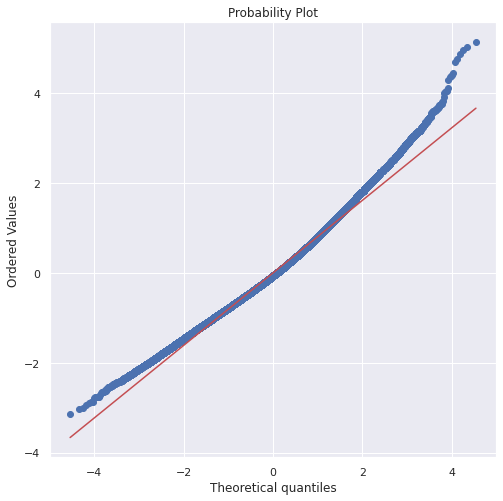

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid, plot=plt);

Analizing perfomance (metrics)

In [30]:
N = Xtrain.shape[0]
# using statsmodel
prediction = result.predict(sm.add_constant(Xtrain))
mean_square_error_sk = mean_squared_error(Ytrain, prediction)
print(mean_square_error_sk)

0.656734636562843


In [31]:
norm_mse_sk = 1-r2_score(Ytrain,prediction)
print(norm_mse_sk)

R_squared_sk = r2_score(Ytrain,prediction) 
print(R_squared_sk)

0.6942016434470235
0.3057983565529765


In [32]:
predTest = result.predict(sm.add_constant(Xtest))
mean_square_error_sk = mean_squared_error(Ytest, predTest)
print(mean_square_error_sk)

0.963506423473628


In [70]:
# We will see if we are doing better than random
Xtrain_zero = pd.DataFrame(0, index=Xtrain.index, columns=[])
model = sm.OLS(Ytrain, sm.add_constant(Xtrain_zero))
result = model.fit()


N = Xtrain_zero.shape[0]
# using statsmodel
prediction = result.predict(sm.add_constant(Xtrain_zero))
mean_square_error_sk = mean_squared_error(Ytrain, prediction)
print(mean_square_error_sk)

result.summary()

0.9460286398946854


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ModMaximumInstalls   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                nan
Time:                        11:28:57   Log-Likelihood:            -3.4694e+05
No. Observations:              249379   AIC:                         6.939e+05
Df Residuals:                  249378   BIC:                         6.939e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0739      0.002    -37.925      0.000      -0.078      -0.070
==============================================================================
Omnibus:                    12792.251   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15114.103
Skew:                           0.560   Prob(JB):                         0.00
Kurtosis:                       3.448   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE is the same!

## SECTION 5: Regularized Linear Regression: Ridge and Lasso

First we look for the $lambda$ that fits better out model

In [73]:
lambdas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=lambdas,cv=5)
ridge_cv.fit(Xtrain,Ytrain)

Ridge_r2 = np.mean(cross_val_score(ridge_cv, Xtrain, Ytrain, cv=5))


# Number of observations and number of features
n = Xtrain.shape[0]
p = np.sum(ridge_cv.coef_ != 0)  # Number of non-zero coefficients, we could also use T-test

# Retrieve AIC and BIC from the fitted model


# Calculate Adjusted R2
r2_adjusted = 1 - (1 - Ridge_r2) * (n - 1) / (n - p - 1)

print('Best lambda:', ridge_cv.alpha_)
print('R2 adjusted:', r2_adjusted)
print('R2 score:', Ridge_r2)
print('MSE:', mse)

Best lambda: 10.0
R2 adjusted: 0.3051793551595229
R2 score: 0.30536881775786423
MSE: 0.6970424604368829


In [74]:
lasso_cv =LassoCV(alphas=lambdas,cv=5)
lasso_cv.fit(Xtrain,Ytrain)

predictions = lasso_cv.predict(Xtrain)
mse = mean_squared_error(Ytrain, predictions)

lasso_r2 = np.mean(cross_val_score(lasso_cv, Xtrain, Ytrain, cv=5))


# Number of observations and number of features
n = Xtrain.shape[0]
p = np.sum(lasso_cv.coef_ != 0)  # Number of non-zero coefficients, we could also use T-test


# Calculate Adjusted R2
r2_adjusted = 1 - (1 - lasso_r2) * (n - 1) / (n - p - 1)

print('Best lambda:', lasso_cv.alpha_)
print('R2 adjusted:', r2_adjusted)
print('R2 score:', lasso_r2)
print('MSE:', mse)


Best lambda: 0.01
R2 adjusted: 0.2630482207003635
R2 score: 0.26308663777456764
MSE: 0.6970424604368829


## Undertanding the model

In [38]:
weights = pd.DataFrame({'lr':lr.coef_, 'ridge_cv':ridge_cv.coef_, 'lasso_cv':lasso_cv.coef_},index=Xtrain.columns)
weights.T

Rating  Released  ModRating  ModPrice  ModSize  ModLast Updated  \
lr         0.862     0.379     -0.715    -0.034    0.032           -0.260   
ridge_cv   0.860     0.379     -0.714    -0.035    0.032           -0.260   
lasso_cv   0.243     0.336     -0.344    -0.051    0.033           -0.235   

          CategoryMusic & Audio  CategoryNews & Magazines  CategoryLifestyle  \
lr                   -2.213e+09                -2.213e+09         -2.213e+09   
ridge_cv             -1.785e-01                -3.764e-01         -8.895e-02   
lasso_cv             -1.742e-02                -0.000e+00         -0.000e+00   

          CategoryAction  ...  Content RatingMature 17+  \
lr            -2.213e+09  ...                 8.256e+09   
ridge_cv       2.820e-01  ...                -1.429e-02   
lasso_cv       0.000e+00  ...                 0.000e+00   

          Content RatingEveryone 10+  Content RatingAdults only 18+  \
lr                         8.256e+09                      8.256e+09   
ridge_cv                   2.440e-02                      1.939e-01   
lasso_cv                   0.000e+00                      0.000e+00   

          Content RatingUnrated  Ad SupportedTrue  Ad SupportedFalse  \
lr                    8.256e+09         1.483e+11          1.483e+11   
ridge_cv             -1.568e-01         2.011e-01         -2.011e-01   
lasso_cv             -0.000e+00         4.888e-01         -0.000e+00   

          In App PurchasesFalse  In App PurchasesTrue  Editors ChoiceFalse  \
lr                   -1.057e+11            -1.057e+11           -6.880e+08   
ridge_cv             -1.966e-01             1.966e-01           -7.886e-01   
lasso_cv             -4.277e-01             1.706e-14           -0.000e+00   

          Editors ChoiceTrue  
lr                -6.880e+08  
ridge_cv           7.886e-01  
lasso_cv           0.000e+00  

[3 rows x 68 columns]

<Axes: >

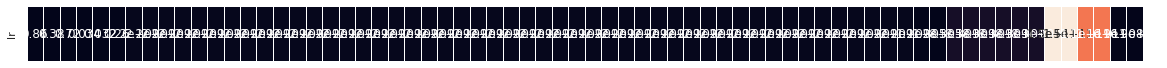

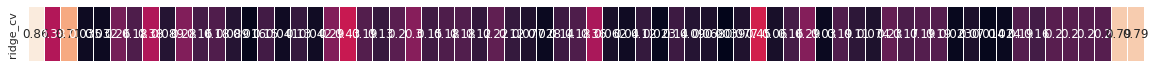

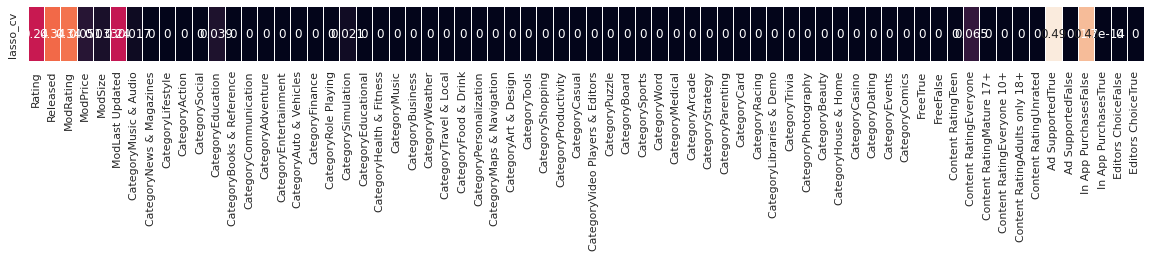

In [39]:
fig,  ax = plt.subplots( figsize = (20,1))
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False)

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['ridge_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False)

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['lasso_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True)

<Axes: >

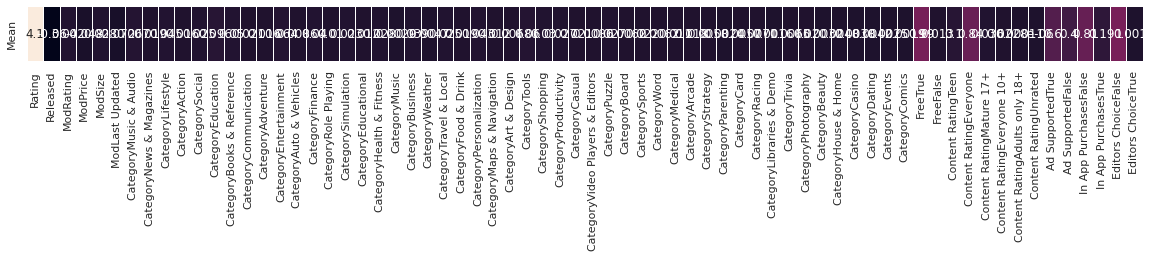

In [40]:
plt.figure(figsize = (20,1))
sns.heatmap(Xtrain.mean().to_frame().T.rename(index={0:'Mean'}),annot=True, linewidths=.5,cbar=False,xticklabels=True)

We can notice that the are no clear patterns between different models, the ridge and linear regression might be the closest ones but there is still no clear patterns. We will try to scale the data, altough the real reason is the little correlation.

In [41]:
def scaling_preprocessing(X, y, scaler=None):
    print('Original shape:{}'.format(X.shape))
    categorical_columns = X.dtypes[X.dtypes == 'category'].index.values
    
    # We scale the numerical columns
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    if scaler is None: 
        # We only want the scaler to fit the train data
        scaler = MinMaxScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

    return X, y, scaler

Xtrain, Ytrain, scaler = scaling_preprocessing(Xtrain,Ytrain)

Original shape:(249379, 68)


<Axes: >

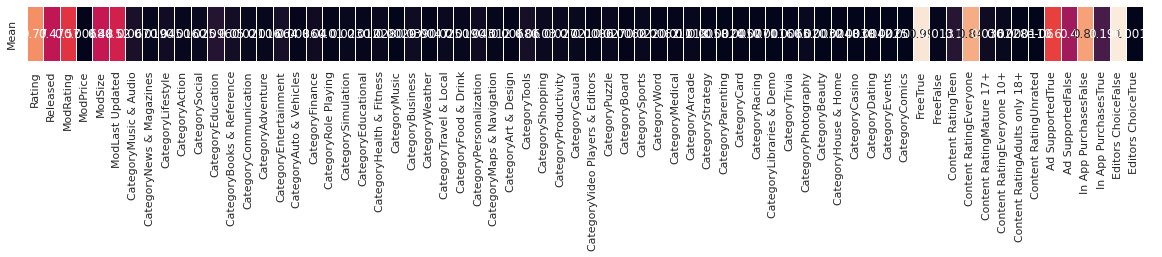

In [42]:
plt.figure(figsize = (20,1))
sns.heatmap(Xtrain.mean().to_frame().T.rename(index={0:'Mean'}),annot=True, linewidths=.5,cbar=False,xticklabels=True)

In [43]:
lr_scaled = LinearRegression()
lr_scaled.fit(Xtrain,Ytrain)
r2_lr_scaled = np.mean(cross_val_score(lr_scaled, Xtrain,Ytrain, cv=5, scoring='r2'))

ridge_cv_scaled =RidgeCV(alphas=lambdas,cv=5)
ridge_cv_scaled.fit(Xtrain,Ytrain)
r2_ridge_scaled = np.mean(cross_val_score(ridge_cv_scaled, Xtrain,Ytrain, cv=5, scoring='r2'))


lasso_cv_scaled =LassoCV(alphas=lambdas,cv=5)
lasso_cv_scaled.fit(Xtrain,Ytrain)
r2_lasso_scaled = np.mean(cross_val_score(ridge_cv_scaled, Xtrain,Ytrain, cv=5, scoring='r2'))

weights = pd.DataFrame({'lr scaled':lr_scaled.coef_, 'ridge_cv scaled':ridge_cv_scaled.coef_, 'lasso_cv scaled':lasso_cv_scaled.coef_},index=Xtrain.columns)
weights.T

Rating  Released  ModRating  ModPrice  ModSize  \
lr scaled         3.449     0.966     -3.252    -0.436    0.186   
ridge_cv scaled   3.433     0.966     -3.240    -0.432    0.186   
lasso_cv scaled  -0.000     0.693     -0.730    -0.000    0.000   

                 ModLast Updated  CategoryMusic & Audio  \
lr scaled                 -1.343              3.607e+10   
ridge_cv scaled           -1.343             -1.788e-01   
lasso_cv scaled           -0.903             -3.591e-02   

                 CategoryNews & Magazines  CategoryLifestyle  CategoryAction  \
lr scaled                       3.607e+10          3.607e+10       3.607e+10   
ridge_cv scaled                -3.773e-01         -8.926e-02       2.827e-01   
lasso_cv scaled                -0.000e+00         -0.000e+00       0.000e+00   

                 ...  Content RatingMature 17+  Content RatingEveryone 10+  \
lr scaled        ...                 2.612e+10                   2.612e+10   
ridge_cv scaled  ...                 5.830e-02                   9.659e-02   
lasso_cv scaled  ...                 0.000e+00                   0.000e+00   

                 Content RatingAdults only 18+  Content RatingUnrated  \
lr scaled                            2.612e+10              2.612e+10   
ridge_cv scaled                      3.265e-01             -5.791e-01   
lasso_cv scaled                      0.000e+00             -0.000e+00   

                 Ad SupportedTrue  Ad SupportedFalse  In App PurchasesFalse  \
lr scaled               8.382e+11          8.382e+11             -1.144e+11   
ridge_cv scaled         2.011e-01         -2.011e-01             -1.965e-01   
lasso_cv scaled         4.876e-01         -0.000e+00             -4.548e-01   

                 In App PurchasesTrue  Editors ChoiceFalse  Editors ChoiceTrue  
lr scaled                  -1.144e+11            5.343e+08           5.343e+08  
ridge_cv scaled             1.965e-01           -8.004e-01           8.004e-01  
lasso_cv scaled             1.566e-15           -0.000e+00           0.000e+00  

[3 rows x 68 columns]

Let's try from scratch but using one hot encoding for categorical variables intead of binary variables

In [47]:
datasetTrain = pd.read_csv('../Dades/X_train_modified.csv')
datasetTest  = pd.read_csv('../Dades/X_test_modified.csv')

columsToDrop = ['Maximum Installs', 'Price', 'Size', 'Download', 'Last Updated', 'Installs', 'ModInstalls', 'ModExit', 'Exit']
categoricalColumns = ['Category', 'Free', 'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice']

# Convert to categorical variables
for column in categoricalColumns:
    datasetTrain[column] = datasetTrain[column].astype('category')
    datasetTest[column] = datasetTest[column].astype('category')

# Drop repeated or unwanted data (Installs is the catageorial version of "Maximum installs")
datasetTrain = datasetTrain.drop(columns=columsToDrop)
datasetTest  = datasetTest.drop(columns=columsToDrop)
    

In [48]:
Xtrain = datasetTrain.loc[:, datasetTrain.columns != 'ModMaximumInstalls']
Ytrain = datasetTrain['ModMaximumInstalls']

Xtest = datasetTest.loc[:, datasetTest.columns != 'ModMaximumInstalls']
Ytest = datasetTest['ModMaximumInstalls']



In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def categorical_preprocessing(X, y, preprocessor=None):
    print('Original shape:{}'.format(X.shape))
    
    # Identify categorical and numerical columns
    categorical_columns = X.select_dtypes(include=['category', 'object']).columns.tolist()
    numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
    
    if preprocessor is None:
        # Define the preprocessing pipeline
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', MinMaxScaler(), numerical_columns),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
            ]
        )
        
        # Fit the preprocessor on the training data
        X = preprocessor.fit_transform(X)
    else:
        # Transform the test data using the pre-fitted preprocessor
        X = preprocessor.transform(X)
    
    return X, y, preprocessor


Xtrain, Ytrain, preprocessor = categorical_preprocessing(Xtrain,Ytrain)
Xtest, Ytest, _ = categorical_preprocessing(Xtest,Ytest,preprocessor)

Original shape:(249379, 12)
Original shape:(122816, 12)


In [50]:
lr_one_hot = LinearRegression()
lr_one_hot.fit(Xtrain,Ytrain)

r2_lr_one_hot_train = lr_one_hot.score(Xtrain,Ytrain)
r2_lr_one_hot_cv = np.mean(cross_val_score(lr_one_hot, Xtrain,Ytrain, cv=5, scoring='r2'))

print('Train R2 score: {}\nCross-Validation R2 score: {}'.format(r2_lr_one_hot_train, r2_lr_one_hot_cv))

Train R2 score: 0.3057984474580717
Cross-Validation R2 score: 0.30535630895068805


Yet the R2 score is the same as in the first try, 30%, which is basically what you get from random